По аппаратному обеспечению смартфона необходимо предсказать класс его цены,т.е. принадлежность цены к некоторому интервалу.
battery_power    емкость батареи в mAh
blue             наличие bluetooth
clock_speed      частота процессора в Ггц
dual_sim         наличие поддержки двух сим-карт
fc               разрешение фронтальной камеры в Mpx
four_g           наличие модуля 4G
int_memory       объем встроенной памяти в Гб
m_dep            толщина смартфона в см
mobile_wt        вес смартфона
n_cores          число ядер процессора
pc               разрешение основной камеры в Mpx
px_height        разрешение дисплея по высоте
px_width         разрешение дисплея по ширине
ram              объем оперативной памяти в Мб
sc_h             длина смартфона в см
sc_w             ширина смартфона в см
talk_time        время непрерывного разговора на одном заряде батареи в часах
three_g          наличие модуля 3G
touch_screen     наличие сенсорного экрана
wifi             наличие модуля wifi
price_range      класс цены

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
#Читаем файл.
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/train.csv")
data.head()

Mounted at /content/drive


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
import os
os.listdir('/content/drive/MyDrive')

['ИИТММ',
 'Английский',
 'SSH',
 'ВМ',
 'Справочная информация',
 'Ссылки',
 'Посмотреть позже',
 'Alzex Finance',
 'Keras - инструмент глубокого обучения.PDF.crdownload',
 'ML',
 'HTML + CSS.zip',
 '1',
 'Kaggle',
 'bot.gdoc',
 'face.gdoc',
 'models.gsheet',
 'Диплом ?магистратура.gdoc',
 'pretrained_model',
 'Новый документ (2).gdoc',
 'main.exe',
 'Desktop 2020.05.06 - 20.33.49.02.mp4',
 'Desktop 2020.05.06 - 21.17.03.08.mp4',
 'Lipatov_08.pdf',
 'Lipatov_09.pdf',
 'Lipatov_10.pdf',
 'Lipatov_add.pdf',
 '[Mod.Anomaly] База знаний. Артефакты, шкуры и модули.gsheet',
 'Темы магистратура.gdoc',
 'Диплом.gdoc',
 'МО.7z',
 'ToLearn.gdoc',
 'Lipatov_ID_docs.pdf',
 'New Round-Up 6.7z',
 'New Round-Up 6.zip',
 'Новый документ (1).gdoc',
 'Новая таблица.gsheet',
 'Новый документ.gdoc',
 'Прививки.gsheet',
 'Документы ЛипатовИД.zip',
 'train.csv',
 'New_York_Restaurant_Inspection.csv',
 'BigDataCourse.ipynb',
 'Colab Notebooks',
 'mobile-phone-price-classification.ipynb']

Среднее
battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64
Разброс
battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.86

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


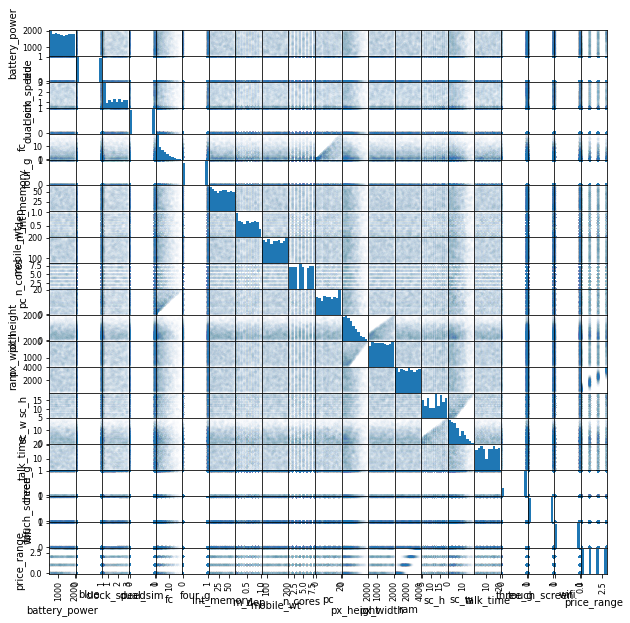

In [ ]:
#Визуализация
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass
print('Среднее')
print(data.mean())
print('Разброс')
print(data.var())
#Корреляционная матрица
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#В датасете нет пропущенных значений. Добавим их.
rows = list(data.columns.values)
rows.remove('price_range')
types = []
for i in range(0,len(rows)):
    types.append(np.float64)
data = data.astype(dict(zip(rows,types)))
for name in rows:
    for i in np.random.randint(0,2000,np.random.randint(0,100)):
        try: 
            data.at[i,name] = np.nan
        except ValueError:
            pass


In [ ]:
#Убедимся,что они появились.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1950 non-null   float64
 1   blue           1946 non-null   float64
 2   clock_speed    1953 non-null   float64
 3   dual_sim       1974 non-null   float64
 4   fc             1987 non-null   float64
 5   four_g         1950 non-null   float64
 6   int_memory     1934 non-null   float64
 7   m_dep          1985 non-null   float64
 8   mobile_wt      1982 non-null   float64
 9   n_cores        1911 non-null   float64
 10  pc             1905 non-null   float64
 11  px_height      1910 non-null   float64
 12  px_width       1934 non-null   float64
 13  ram            1950 non-null   float64
 14  sc_h           1977 non-null   float64
 15  sc_w           1940 non-null   float64
 16  talk_time      1994 non-null   float64
 17  three_g        1974 non-null   float64
 18  touch_sc

In [ ]:
#Заполним пропущенные значения средним.
data.mask(np.isinf(data))
data.fillna(data.mean(),inplace=True)

In [ ]:
#Убедимся,что больше нет пропущенных значений.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

In [ ]:
#Нормируем данные.
# data = (data-data.mean())/data.std()
rows = list(data.columns.values)
rows.remove('price_range')
for name in rows:
    data[name] = (data[name]-data[name].mean())/data[name].std()
print(data.var())

battery_power    1.000000
blue             1.000000
clock_speed      1.000000
dual_sim         1.000000
fc               1.000000
four_g           1.000000
int_memory       1.000000
m_dep            1.000000
mobile_wt        1.000000
n_cores          1.000000
pc               1.000000
px_height        1.000000
px_width         1.000000
ram              1.000000
sc_h             1.000000
sc_w             1.000000
talk_time        1.000000
three_g          1.000000
touch_screen     1.000000
wifi             1.000000
price_range      1.250625
dtype: float64


In [ ]:
#Разделим датасет на обучающую и тестовую выборки.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

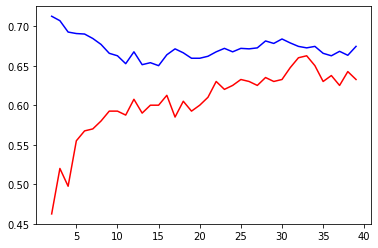

In [ ]:
#И обучим KNeighborsClassifier.
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
train_accuracy = {}
test_accuracy = {}
for i in range(2,40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    rows = list(data.columns.values)
    rows.remove('price_range')
    neigh.fit(train[rows], train['price_range'])
    tr_a = neigh.score(train[rows], train['price_range'])
    train_accuracy[i] = tr_a
    #print('train accuracy: ',tr_a)
    te_a = neigh.score(test[rows], test['price_range'])
    test_accuracy[i] = te_a
    #print('test accuracy: ',te_a)
lists = sorted(train_accuracy.items())
x_train, y_train = zip(*lists)
lists = sorted(test_accuracy.items())
x_test, y_test = zip(*lists)
plt.plot(x_train, y_train, 'b', label='train')
plt.plot(x_test, y_test, 'r', label='test')
plt.show()

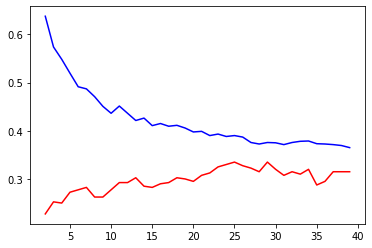

In [ ]:
#В данных есть переменная,которая сильно коррелирует с меткой класса.
#Избавимся от нее.
data = data.drop(columns=['ram'])
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
train_accuracy = {}
test_accuracy = {}
for i in range(2,40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    rows = list(data.columns.values)
    rows.remove('price_range')
    neigh.fit(train[rows], train['price_range'])
    tr_a = neigh.score(train[rows], train['price_range'])
    train_accuracy[i] = tr_a
    #print('train accuracy: ',tr_a)
    te_a = neigh.score(test[rows], test['price_range'])
    test_accuracy[i] = te_a
    #print('test accuracy: ',te_a)
lists = sorted(train_accuracy.items())
x_train, y_train = zip(*lists)
lists = sorted(test_accuracy.items())
x_test, y_test = zip(*lists)
plt.plot(x_train, y_train, 'b', label='train')
plt.plot(x_test, y_test, 'r', label='test')
plt.show()

Выводы:
1) С низким значением n соседей KNeighborsClassifier переобучается.
2) Наличие переменной,которая сильно скорелирована с меткой класса,значительно улучшает качетво классификации.
3) KNeighborsClassifier показывает низкую точность классификации.

In [ ]:
#Вернем данные к первоначальному виду.
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/train.csv")
rows = list(data.columns.values)
rows.remove('price_range')
types = []
for i in range(0,len(rows) - 3):
    types.append(np.float64)
data = data.astype(dict(zip(rows,types)))
for name in rows:
    for i in np.random.randint(0,2000,np.random.randint(0,100)):
        try: 
            data.at[i,name] = np.nan
        except ValueError:
            pass
# data.replace([np.inf, -np.inf], np.nan)
data.mask(np.isinf(data))
data = data.fillna(data.mean())
#data = (data-data.mean())/data.std()
rows = list(data.columns.values)
rows.remove('price_range')
for name in rows:
    data[name] = (data[name]-data[name].mean())/data[name].std()
# print(data.isnull().sum())
# print(data.var())
# print(rows)

In [ ]:
#Выполним PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
rows = list(data.columns.values)
rows.remove('price_range')
principalComponents = pca.fit_transform(data.drop(columns=['price_range']))
principalDf = pd.DataFrame(data = principalComponents)
new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
new_data.head()

,0,1,2,3,4,price_range
0,0.413015,-2.596391,-0.882477,-1.381519,-0.392129,1
1,-2.063416,0.584898,0.340400,1.364751,0.096147,2
2,-1.351863,0.295440,0.088701,2.272965,-0.173118,2
3,-1.236117,-0.452978,1.661814,0.366793,-1.213001,2
4,1.725997,1.382029,-0.137905,1.767186,-1.629060,1


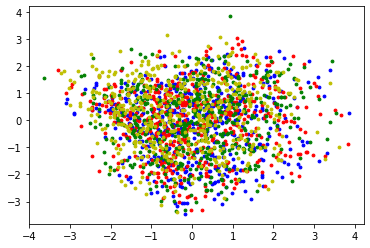

In [ ]:
#Снизим размерность до 2 и изобразим точки.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
#data = data.drop(columns=['ram'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.drop(columns=['price_range']))
principalDf = pd.DataFrame(data = principalComponents)
new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
color = None
#plt.xlim(right=2,left=-2)
#plt.ylim(top=2,bottom=-2)
#plt.axis([-2, 2, -2, 2])
for i in range(0,4):
    if i == 0:
        color = 'b'
    if i == 1:
        color = 'r'
    if i == 2:
        color = 'g'
    if i == 3:
        color = 'y'
    df = new_data[new_data['price_range'] == i]
    plt.scatter(list(df[0]),list(df[1]),c=color,s=8)  
plt.show()

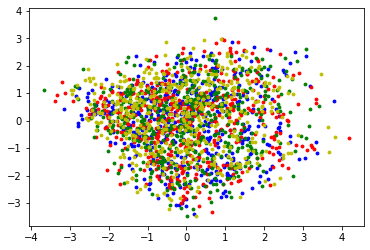

In [ ]:
#Удалим скоррелированную переменную и изобразим точки.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
#data = data.drop(columns=['ram'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.drop(columns=['price_range','ram']))
principalDf = pd.DataFrame(data = principalComponents)
new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
color = None
for i in range(0,4):
    if i == 0:
        color = 'b'
    if i == 1:
        color = 'r'
    if i == 2:
        color = 'g'
    if i == 3:
        color = 'y'
    df = new_data[new_data['price_range'] == i]
    plt.scatter(list(df[0]),list(df[1]),c=color,s=8)
plt.show()

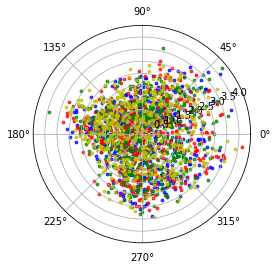

In [ ]:
#Попробуем изобразить их в полярных координатах.
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def plot_polar(data):
    #data = data.drop(columns=['ram'])
    data.fillna(0)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data.drop(columns=['price_range','ram']))
    principalDf = pd.DataFrame(data = principalComponents)
    new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
    color = None
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    for i in range(0,4):
        #print(i)
        if i == 0:
            color = 'b'
        if i == 1:
            color = 'r'
        if i == 2:
            color = 'g'
        if i == 3:
            color = 'y'
        df = new_data[new_data['price_range'] == i]
        x = np.array(df[0])
        y = np.array(df[1])
        r = np.sqrt(x**2+y**2)
        theta = np.arctan2(y,x)
        # for j in range(0,2000):
        #     if j % 100 == 0:
        #         print(j)
        #     rho, phi = cart2pol(df[0],df[1])
        #     r.append(rho)
        #     theta.append(phi)
        
        ax.scatter(theta, r, c=color, cmap='hsv', alpha=0.75, s=8)
    plt.show()
    pass

plot_polar(data)

18 train  0.974375  test  0.8725
17 train  0.973125  test  0.875
16 train  0.97375  test  0.8675
15 train  0.96875  test  0.8675
14 train  0.844375  test  0.655
13 train  0.7725  test  0.5425
12 train  0.749375  test  0.5125
11 train  0.73  test  0.52
10 train  0.700625  test  0.475
9 train  0.63  test  0.405
8 train  0.6075  test  0.37
7 train  0.555  test  0.3925
6 train  0.516875  test  0.3775
5 train  0.41125  test  0.3175
4 train  0.391875  test  0.29
3 train  0.35625  test  0.3425
2 train  0.330625  test  0.28
1 train  0.314375  test  0.2425


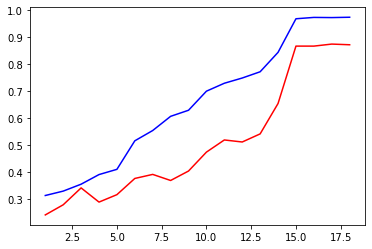

In [ ]:
#Построим график зависимости доли правильных ответов от количества компонент.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
train_err = {}
test_err = {}
rows = list(data.columns.values)
rows.remove('price_range')
#data = data.drop(columns=['ram'])
for i in range(18,0,-1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(data.drop(columns=['price_range']))
    principalDf = pd.DataFrame(data = principalComponents)
    new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
    train, test = train_test_split(new_data, test_size=0.2, random_state=42)
    clf = SVC(gamma='auto')
    rows = list(new_data.columns.values)
    rows.remove('price_range')
    clf.fit(train[rows], train['price_range'])
    train_error = clf.score(train[rows], train['price_range'])
    test_error = clf.score(test[rows], test['price_range'])
    print(i,'train ',train_error,' test ', test_error)
    #print('train error: ', train_error)
    #print('test error: ', test_error)
    train_err[i] = train_error
    test_err[i] = test_error
lists = sorted(train_err.items())
x_train, y_train = zip(*lists)
lists = sorted(test_err.items())
x_test, y_test = zip(*lists)
plt.plot(x_train, y_train, 'b', label='train')
plt.plot(x_test, y_test, 'r', label='test')
plt.show()

18 train  0.63125  test  0.34
17 train  0.626875  test  0.325
16 train  0.6425  test  0.3225
15 train  0.643125  test  0.3225
14 train  0.6325  test  0.31
13 train  0.615625  test  0.335
12 train  0.586875  test  0.305
11 train  0.576875  test  0.3275
10 train  0.5475  test  0.32
9 train  0.53  test  0.33
8 train  0.514375  test  0.3225
7 train  0.479375  test  0.3375
6 train  0.444375  test  0.3
5 train  0.4125  test  0.3
4 train  0.39  test  0.315
3 train  0.350625  test  0.3275
2 train  0.319375  test  0.2825
1 train  0.315625  test  0.2475


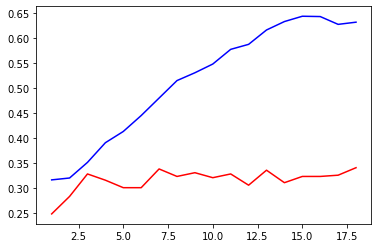

In [ ]:
#Уберем переменную,коррелирующую с меткой класса.
#Построим график зависимости доли правильных ответов от количества компонент.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
train_err = {}
test_err = {}
rows = list(data.columns.values)
rows.remove('price_range')
#data = data.drop(columns=['ram'])
for i in range(18,0,-1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(data.drop(columns=['price_range','ram']))
    principalDf = pd.DataFrame(data = principalComponents)
    new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
    train, test = train_test_split(new_data, test_size=0.2, random_state=42)
    clf = SVC(gamma='auto')
    rows = list(new_data.columns.values)
    rows.remove('price_range')
    clf.fit(train[rows], train['price_range'])
    train_error = clf.score(train[rows], train['price_range'])
    test_error = clf.score(test[rows], test['price_range'])
    print(i,'train ',train_error,' test ', test_error)
    #print('train error: ', train_error)
    #print('test error: ', test_error)
    train_err[i] = train_error
    test_err[i] = test_error
lists = sorted(train_err.items())
x_train, y_train = zip(*lists)
lists = sorted(test_err.items())
x_test, y_test = zip(*lists)
plt.plot(x_train, y_train, 'b', label='train')
plt.plot(x_test, y_test, 'r', label='test')
plt.show()

PCA не помог снизить ошибку.

In [ ]:
#Вернем данные к первоначальному виду.
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/train.csv")
rows = list(data.columns.values)
rows.remove('price_range')
types = []
for i in range(0,len(rows) - 3):
    types.append(np.float64)
data = data.astype(dict(zip(rows,types)))
for name in rows:
    for i in np.random.randint(0,2000,np.random.randint(0,100)):
        try: 
            data.at[i,name] = np.nan
        except ValueError:
            pass
# data.replace([np.inf, -np.inf], np.nan)
data.mask(np.isinf(data))
data = data.fillna(data.mean())
#data = (data-data.mean())/data.std()
rows = list(data.columns.values)
rows.remove('price_range')
for name in rows:
    data[name] = (data[name]-data[name].mean())/data[name].std()
# print(data.isnull().sum())
# print(data.var())
# print(rows)

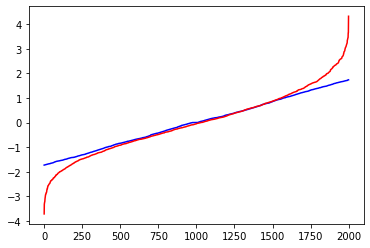

In [ ]:
#Сранение 1й компоненты PCA и скоррелированной переменной.
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
rows = list(data.columns.values)
rows.remove('price_range')
principalComponents = pca.fit_transform(data.drop(columns=['price_range']))
principalDf = pd.DataFrame(data = principalComponents)
new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
plt.plot(list(range(0,2000)), sorted(list(data['ram'])), 'b', label='ram')
plt.plot(list(range(0,2000)), sorted(new_data[0]), 'r', label='new_data')
plt.show()

In [ ]:
#Вернем данные к первоначальному виду.
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/train.csv")
rows = list(data.columns.values)
rows.remove('price_range')
types = []
for i in range(0,len(rows) - 3):
    types.append(np.float64)
data = data.astype(dict(zip(rows,types)))
for name in rows:
    for i in np.random.randint(0,2000,np.random.randint(0,100)):
        try: 
            data.at[i,name] = np.nan
        except ValueError:
            pass
# data.replace([np.inf, -np.inf], np.nan)
data.mask(np.isinf(data))
data = data.fillna(data.mean())
#data = (data-data.mean())/data.std()
rows = list(data.columns.values)
# rows.remove('price_range')
# for name in rows:
#     data[name] = (data[name]-data[name].mean())/data[name].std()
# print(data.isnull().sum())
# print(data.var())
# print(rows)

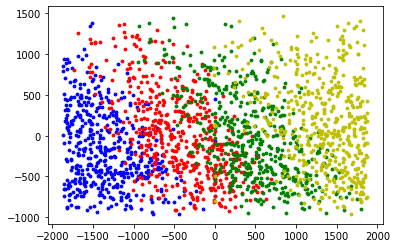

In [ ]:
#Снизим размерность до 2 и изобразим точки.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
#data = data.drop(columns=['ram'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.drop(columns=['price_range']))
principalDf = pd.DataFrame(data = principalComponents)
new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
color = None
#plt.xlim(right=2,left=-2)
#plt.ylim(top=2,bottom=-2)
#plt.axis([-2, 2, -2, 2])
for i in range(0,4):
    if i == 0:
        color = 'b'
    if i == 1:
        color = 'r'
    if i == 2:
        color = 'g'
    if i == 3:
        color = 'y'
    df = new_data[new_data['price_range'] == i]
    plt.scatter(list(df[0]),list(df[1]),c=color,s=8)  
plt.show()

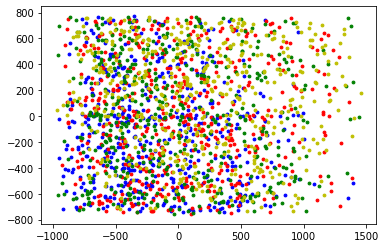

In [ ]:
#Снизим размерность до 2 и изобразим точки.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
#data = data.drop(columns=['ram'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.drop(columns=['price_range','ram']))
principalDf = pd.DataFrame(data = principalComponents)
new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
color = None
#plt.xlim(right=2,left=-2)
#plt.ylim(top=2,bottom=-2)
#plt.axis([-2, 2, -2, 2])
for i in range(0,4):
    if i == 0:
        color = 'b'
    if i == 1:
        color = 'r'
    if i == 2:
        color = 'g'
    if i == 3:
        color = 'y'
    df = new_data[new_data['price_range'] == i]
    plt.scatter(list(df[0]),list(df[1]),c=color,s=8)  
plt.show()

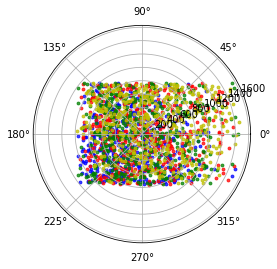

In [ ]:
#Попробуем изобразить их в полярных координатах.
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def plot_polar(data):
    #data = data.drop(columns=['ram'])
    data.fillna(0)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data.drop(columns=['price_range','ram']))
    principalDf = pd.DataFrame(data = principalComponents)
    new_data = pd.concat([principalDf,data['price_range']], axis=1, sort=False)
    color = None
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    for i in range(0,4):
        #print(i)
        if i == 0:
            color = 'b'
        if i == 1:
            color = 'r'
        if i == 2:
            color = 'g'
        if i == 3:
            color = 'y'
        df = new_data[new_data['price_range'] == i]
        x = np.array(df[0])
        y = np.array(df[1])
        r = np.sqrt(x**2+y**2)
        theta = np.arctan2(y,x)
        # for j in range(0,2000):
        #     if j % 100 == 0:
        #         print(j)
        #     rho, phi = cart2pol(df[0],df[1])
        #     r.append(rho)
        #     theta.append(phi)
        
        ax.scatter(theta, r, c=color, cmap='hsv', alpha=0.75, s=8)
    plt.show()
    pass

plot_polar(data)

In [3]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")
#В датасете нет пропущенных значений. Добавим их.
rows = list(data.columns.values)
rows.remove('price_range')
types = []
for i in range(0,len(rows)):
    types.append(np.float64)
data = data.astype(dict(zip(rows,types)))
for name in rows:
    for i in np.random.randint(0,2000,np.random.randint(0,100)):
        try: 
            data.at[i,name] = np.nan
        except ValueError:
            pass
#Заполним пропущенные значения средним.
data.mask(np.isinf(data))
data.fillna(data.mean(),inplace=True)
#Нормируем данные.
# data = (data-data.mean())/data.std()
rows = list(data.columns.values)
rows.remove('price_range')
for name in rows:
    data[name] = (data[name]-data[name].mean())/data[name].std()
#print(data.var())
#Разделим датасет на обучающую и тестовую выборки.
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(data, test_size=0.2)

In [4]:
import keras
from keras import backend as K

In [5]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [49]:
from keras.utils.np_utils import to_categorical
x = data.loc[:, data.columns != 'price_range']
# x = data.loc[:, data.columns != 'price_range'].to_numpy()
# x = to_categorical(x)
print(x.shape)
y = data['price_range']
# y = data['price_range'].to_numpy()
# y = to_categorical(y)
# print(y.shape)
hist = [[],[],[]]
#loss, accuracy, f1_score, precision, recall
ts_errs = [[],[],[]]
i = 0
while i < 3:
  model = keras.Sequential()
  model.add(keras.Input(shape=(20,)))
  j = 0
  while j < i:
    model.add(keras.layers.Dense(20, activation='softmax'))
    j += 1
  #model.add(keras.layers.Dense(4, activation='softmax'))
  #model.build((None, 20))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
                #metrics=['accuracy',f1_m,precision_m, recall_m])
  model.summary()
  hist[i] = model.fit(x, y, validation_split=0.3, epochs=1000, verbose=2)
  i += 1
 


Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 512/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 513/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 514/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 515/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 516/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 517/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 518/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 519/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0433
Epoch 520/1000
44/44 - 0s - loss: 10.8255 - accuracy: 0.0336 - val_loss: 10.9740 - val_accuracy: 0.0

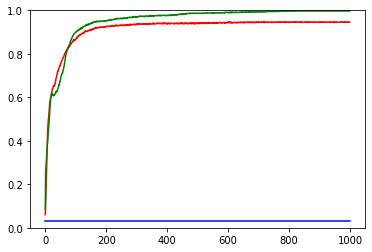

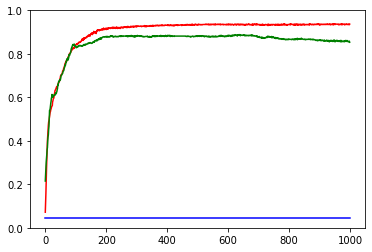

In [52]:
import matplotlib.pylab as plt
plt.ylim(0, 1)
plt.plot(hist[0].history['accuracy'], 'b', label='0')
plt.plot(hist[1].history['accuracy'], 'r', label='1')
plt.plot(hist[2].history['accuracy'], 'g', label='2')
plt.show()
import matplotlib.pylab as plt
plt.ylim(0, 1)
plt.plot(hist[0].history['val_accuracy'], 'b', label='0')
plt.plot(hist[1].history['val_accuracy'], 'r', label='1')
plt.plot(hist[2].history['val_accuracy'], 'g', label='2')
plt.show()

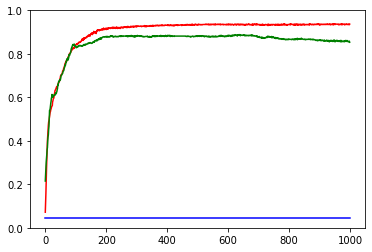